In [1]:
import sys
import requests
import squarify
import math
import json

import pandas as pd
import numpy as np
from datetime import datetime, timezone
from datetime import date

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pyplot as mp
import matplotlib.dates as mdates
import seaborn as sns

from scipy.optimize import curve_fit
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from statsmodels.tsa.stattools import grangercausalitytests
from matplotlib.dates import MO
from matplotlib.ticker import (FormatStrFormatter, MultipleLocator)
from matplotlib import gridspec
from datetime import (datetime, timedelta)
from pandas.plotting import register_matplotlib_converters

In [4]:
df = history(universe=['btc_usd'], bars=1000, freq='H' )
# df = df.to_frame()
df

,btc_usd
2023-05-21 16:00:00,26904.71
2023-05-21 17:00:00,26886.73
2023-05-21 18:00:00,26882.52
2023-05-21 19:00:00,26913.40
2023-05-21 20:00:00,26854.53
...,...
2023-07-02 03:00:00,30512.52
2023-07-02 04:00:00,30532.06
2023-07-02 05:00:00,30488.89
2023-07-02 06:00:00,30485.07


Bought BTC at $26904.71
Bought BTC at $26904.71
Bought BTC at $26904.71
Sold BTC at $26904.71
Sold BTC at $26904.71
Sold BTC at $26904.71
Sold BTC at $26904.71
Sold BTC at $26904.71
Sold BTC at $26904.71
Bought BTC at $26886.73
Bought BTC at $26886.73
Bought BTC at $26886.73
Sold BTC at $26886.73
Sold BTC at $26886.73
Sold BTC at $26886.73
Sold BTC at $26886.73
Sold BTC at $26886.73
Sold BTC at $26886.73
Bought BTC at $26882.52
Bought BTC at $26882.52
Bought BTC at $26882.52
Sold BTC at $26882.52
Sold BTC at $26882.52
Sold BTC at $26882.52
Sold BTC at $26882.52
Sold BTC at $26882.52
Sold BTC at $26882.52
Bought BTC at $26913.4
Bought BTC at $26913.4
Bought BTC at $26913.4
Sold BTC at $26913.4
Sold BTC at $26913.4
Sold BTC at $26913.4
Sold BTC at $26913.4
Sold BTC at $26913.4
Sold BTC at $26913.4
Bought BTC at $26854.53
Bought BTC at $26854.53
Bought BTC at $26854.53
Sold BTC at $26854.53
Sold BTC at $26854.53
Sold BTC at $26854.53
Sold BTC at $26854.53
Sold BTC at $26854.53
Sold BTC at

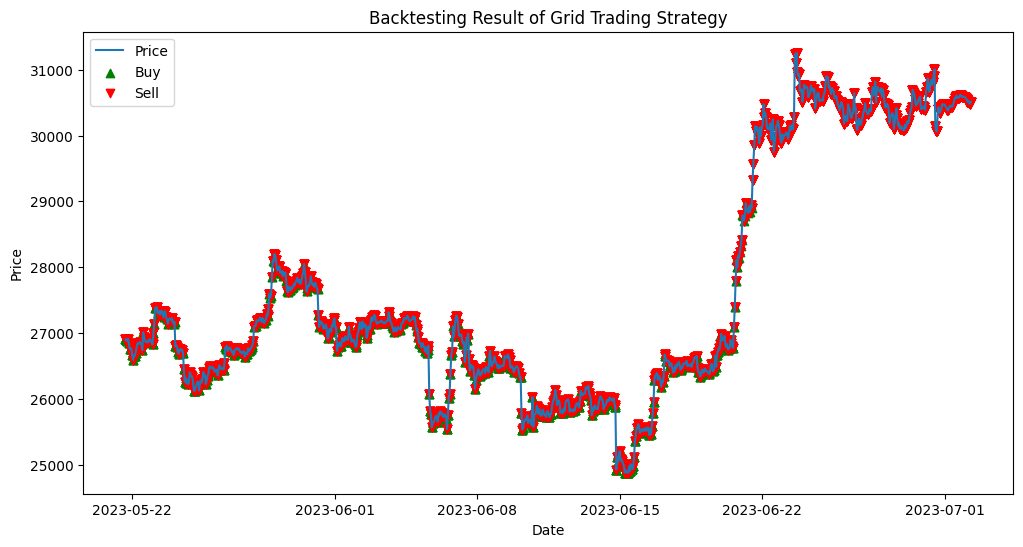

In [5]:
# Set up the grid
lower_limit = 20000
upper_limit = 30000
grid_levels = 10
grid = pd.DataFrame(index=range(grid_levels))
grid['buy_price'] = pd.Series(range(lower_limit, upper_limit, int((upper_limit - lower_limit) / grid_levels)))
grid['sell_price'] = pd.Series(range(upper_limit, lower_limit, -int((upper_limit - lower_limit) / grid_levels)))

# Initialize other necessary variables
capital = 100000  # starting capital, for example
btc = 0  # starting amount of BTC
buy_points = []
sell_points = []

# Iterate through the price data
for index, row in df.iterrows():
    price = row['btc_usd']  # Changed from 'Close' to 'btc_usd'
    # Check for buy orders
    for i, grid_row in grid.iterrows():
        if price <= grid_row['buy_price']:
            btc += capital / (2 * grid_levels) / grid_row['buy_price']  # spend half of capital on buy orders
            capital -= capital / 2
            buy_points.append((index, price))
            print(f"Bought BTC at ${price}")
    # Check for sell orders
    for i, grid_row in grid.iterrows():
        if price >= grid_row['sell_price'] and btc > 0:
            capital += btc / 2 * grid_row['sell_price']  # sell half of BTC at sell orders
            btc -= btc / 2
            sell_points.append((index, price))
            print(f"Sold BTC at ${price}")

# Convert the points to DataFrame for easier plotting
buy_points_df = pd.DataFrame(buy_points, columns=['Date', 'Price'])
sell_points_df = pd.DataFrame(sell_points, columns=['Date', 'Price'])

# Plotting using matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df.index, df['btc_usd'], label='Price')  # Changed from 'Close' to 'btc_usd'
plt.scatter(buy_points_df['Date'], buy_points_df['Price'], color='g', marker='^', label='Buy')
plt.scatter(sell_points_df['Date'], sell_points_df['Price'], color='r', marker='v', label='Sell')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Backtesting Result of Grid Trading Strategy')
plt.legend()
plt.show()
